In [14]:
import pandas as pd
#import pdftotree
from docx import Document
import matplotlib.pyplot as plt

In [15]:
#def extract_data_from_pdf(pdf_path):
    # Parse the PDF and extract text
  #  parsed_pdf = pdftotree.parse(pdf_path)
    
    # Extracted text
  #  text_data = parsed_pdf
    
  #  return text_data
#data = pdftotree.parse("C:/Users/charl/OneDrive - Worcester Polytechnic Institute (wpi.edu)/Desktop/utilities_data_tighe.pdf", 
                      #html_path=None, model_type=None, model_path=None, visualize=False)
    
#pdf_path = "C:/Users/charl/OneDrive - Worcester Polytechnic Institute (wpi.edu)/Desktop/utilities_data_tighe.pdf"
#extracted_text = extract_data_from_pdf(pdf_path)
#print(extracted_text)

In [16]:
def extract_table_data_from_docx(docx_path, table_index=0):
    document = Document(docx_path)
    table = document.tables[table_index]

    data = []
    keys = None

    for i, row in enumerate(table.rows):
        text = [cell.text for cell in row.cells]
        if i == 0:
            keys = text
            continue
        row_data = dict(zip(keys, text))
        data.append(row_data)

    return data


def create_dataframe(table_data):
    df = pd.DataFrame(table_data)
    return df



In [17]:
docx_path = "C:/Users/charl/OneDrive - Worcester Polytechnic Institute (wpi.edu)/WPI_utilities_tighe.docx"
table_data = extract_table_data_from_docx(docx_path)

# Convert the extracted table data into a Pandas DataFrame
df = create_dataframe(table_data)

# Now you can perform data analysis using Pandas
print(df.head())  # Print the first few rows of the DataFrame
print(df.columns)

  Unit num                  Unit Name Fuel/Chemical Quantity Used Unit of Mea  \
0        4         Founders Boiler #4   Natural Gas     4,201,137  cubic feet   
1                                                                               
2                                                                               
3        7  Generator #1 Daniels Hall   Natural Gas        36,201  cubic feet   
4                                                                               

  Pollutant Emission Factor            Unit of Mea2  \
0       CO2         120,000  lbs CO2/106 cubic feet   
1       CH4          2.2708  lbs CH4/106 cubic feet   
2       N2O          0.2205  lbs N2O/106 cubic feet   
3       CO2         120,020  lbs CO2/106 cubic feet   
4       CH4          2.2708  lbs CH4/106 cubic feet   

  Pounds of Pollutant Emitted Tons of Pollutant Emitted Warming Potential  \
0                     504,136                  252.0682                 1   
1                          1

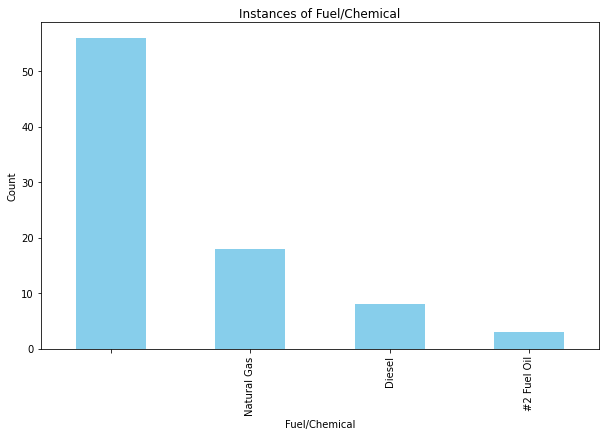

In [18]:
df1 = df.copy()
df1.dropna(subset=["Fuel/Chemical"])

# Count the instances of each fuel/chemical
fuel_counts = df1["Fuel/Chemical"].value_counts()

fuel_counts.plot(kind="bar", figsize=(10, 6), color="skyblue")

# Customize the plot
plt.title("Instances of Fuel/Chemical")
plt.xlabel("Fuel/Chemical")
plt.ylabel("Count")

# Show the plot
plt.show()

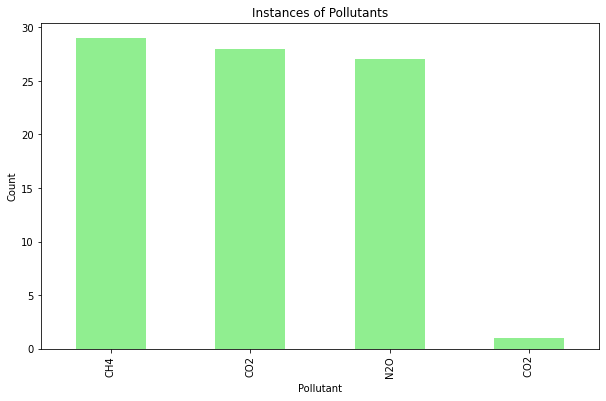

In [19]:
df2 = df.copy()
df2.dropna(subset=["Pollutant"])

# Count the instances of each pollutant
pollutant_counts = df2["Pollutant"].value_counts()

# Create a bar plot
pollutant_counts.plot(kind="bar", figsize=(10, 6), color="lightgreen")

# Customize the plot
plt.title("Instances of Pollutants")
plt.xlabel("Pollutant")
plt.ylabel("Count")

# Show the plot
plt.show()

In [22]:
df3 = df.copy()
df3.dropna(subset=["Pollutant"])

# Count the instances of each pollutant
pollutant_counts = df3["Pollutant"].value_counts()
pollutant_counts = df["Pollutant"].value_counts()

# Consolidate duplicate entries for CO2
pollutant_counts = pollutant_counts.groupby(level=0).sum()

# Create a bar plot
pollutant_counts.plot(kind="bar", figsize=(10, 6), color="lightgreen")

# Customize the plot
plt.title("Instances of Pollutants")
plt.xlabel("Pollutant")
plt.ylabel("Count")

# Show the plot
plt.show()




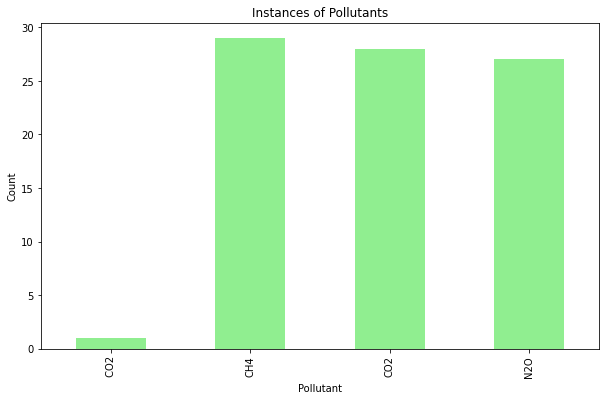

In [27]:
df4 = df.copy()
df4.dropna()

print(df4)

   Unit num                    Unit Name Fuel/Chemical Quantity Used  \
0         4           Founders Boiler #4   Natural Gas     4,201,137   
1                                                                      
2                                                                      
3         7    Generator #1 Daniels Hall   Natural Gas        36,201   
4                                                                      
..      ...                          ...           ...           ...   
80                                                                     
81                                                                     
82       26  Gateway Lattner Boilers (2)   Natural Gas     2,949,778   
83                                                                     
84                                                                     

   Unit of Mea Pollutant Emission Factor            Unit of Mea2  \
0   cubic feet       CO2         120,000  lbs CO2/106 cubic feet   